# Conv Net on Media Eval 2015 Placing Task - Locale

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cs231n.classifiers.cnn import *
# from cs231n.data_utils import get_CIFAR10_data
from cs231n.gradient_check import eval_numerical_gradient_array, eval_numerical_gradient
from cs231n.layers import *
from cs231n.fast_layers import *
from cs231n.solver import Solver

# import own modules
import data_utils

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
# DATA_SET = '000_small'
# DATA_SET = '000_small_50by30'

DATA_BATCH = '000_small_'
DATA_SIZE = '48by32'

DATA_SET = DATA_BATCH + DATA_SIZE

X_input_filename = 'data_maps/' + DATA_SET + '/x_input.npy'
Y_output_filename = 'data_maps/' + DATA_SET + '/y_labels.npy'

In [3]:
X = data_utils.load_npy_file(X_input_filename)
Y = data_utils.load_npy_file(Y_output_filename)
print 'X: {}'.format(X.shape)
print 'Y: {}'.format(Y.shape)
print 'Y sample ', Y[:10]

X: (1880, 32, 48, 3)
Y: (1880,)
Y sample  [0 1 1 2 3 2 4 1 0 2]


In [4]:
num_samples, H, W, C = X.shape

# swap C and H axes --> expected input
X = np.swapaxes(X, 1, 3)  # (num_samples, C, W, H)

NUM_CLASSES = 5

In [5]:
#Splitting into train, val, test sets

num_train = int(num_samples * 0.8)
num_val = int(num_samples * 0.1)
num_test = num_samples - num_train - num_val

print 'num_train: %d, num_val: %d, num_test: %d' % (num_train, num_val, num_test)

X_train = X[:num_train]
X_val = X[num_train:num_train+num_val]
X_test = X[num_train+num_val:]

Y_train = Y[:num_train]
Y_val = Y[num_train:num_train+num_val]
Y_test = Y[num_train+num_val:]

print 'X_train %s, X_val %s, X_test %s' % (X_train.shape, X_val.shape, X_test.shape)
print 'Y_train %s, Y_val %s, Y_test %s' % (Y_train.shape, Y_val.shape, Y_test.shape)


num_train: 1504, num_val: 188, num_test: 188
X_train (1504, 3, 48, 32), X_val (188, 3, 48, 32), X_test (188, 3, 48, 32)
Y_train (1504,), Y_val (188,), Y_test (188,)


## Overfit Small Data

1) Train model to overfit on subset of data

In [6]:
# Hyperparams
LEARN_RATE = 1e-4
WEIGHT_SCALE = 1e-2
NUM_EPOCHS = 20
BATCH_SIZE = 50
REGULARIZATION = 0.001

In [7]:
num_train = 100
small_data = {
  'X_train': X_train[:num_train],
  'y_train': Y_train[:num_train],
  'X_val': X_val[:num_train],
  'y_val': Y_val[:num_train],
}

model = ThreeLayerConvNet(input_dim = (C, W, H), num_classes = 5, weight_scale=WEIGHT_SCALE, reg=REGULARIZATION)

solver = Solver(model, small_data,
                num_epochs=NUM_EPOCHS, batch_size=BATCH_SIZE,
                update_rule='adam',
                optim_config={
                  'learning_rate': LEARN_RATE,
                },
                verbose=True, print_every=1)
solver.train()

(Iteration 1 / 40) loss: 1.767823
(Epoch 0 / 20) train acc: 0.220000; val_acc: 0.210000
(Iteration 2 / 40) loss: 4.386191
(Epoch 1 / 20) train acc: 0.250000; val_acc: 0.230000
(Iteration 3 / 40) loss: 2.493950
(Iteration 4 / 40) loss: 1.903196
(Epoch 2 / 20) train acc: 0.350000; val_acc: 0.240000
(Iteration 5 / 40) loss: 1.559854
(Iteration 6 / 40) loss: 1.570170
(Epoch 3 / 20) train acc: 0.280000; val_acc: 0.140000
(Iteration 7 / 40) loss: 1.572569
(Iteration 8 / 40) loss: 1.615124
(Epoch 4 / 20) train acc: 0.340000; val_acc: 0.180000
(Iteration 9 / 40) loss: 1.510864
(Iteration 10 / 40) loss: 1.491904
(Epoch 5 / 20) train acc: 0.380000; val_acc: 0.140000
(Iteration 11 / 40) loss: 1.375766
(Iteration 12 / 40) loss: 1.388597
(Epoch 6 / 20) train acc: 0.560000; val_acc: 0.250000
(Iteration 13 / 40) loss: 1.411268
(Iteration 14 / 40) loss: 1.238436
(Epoch 7 / 20) train acc: 0.540000; val_acc: 0.220000
(Iteration 15 / 40) loss: 1.381775
(Iteration 16 / 40) loss: 0.909403
(Epoch 8 / 20) tr

2) Plot to show overfitting loss and accuracy

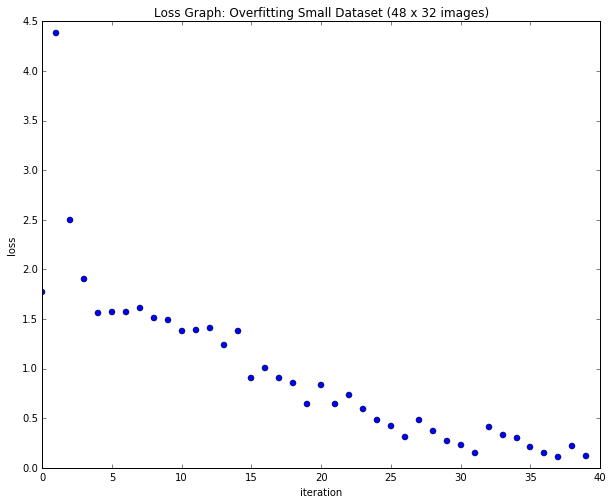

In [8]:
plt.plot(solver.loss_history, 'o')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('Loss Graph: Overfitting Small Dataset (48 x 32 images)')

plt.show()

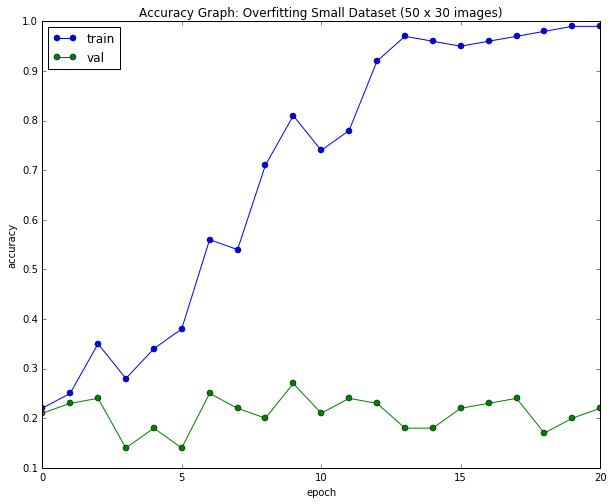

In [9]:
plt.plot(solver.train_acc_history, '-o')
plt.plot(solver.val_acc_history, '-o')
plt.legend(['train', 'val'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy Graph: Overfitting Small Dataset (50 x 30 images)')

plt.show()

## Train on full dataset

In [8]:
full_data = {
  'X_train': X_train,
  'y_train': Y_train,
  'X_val': X_val,
  'y_val': Y_val,
}

### Using Three Layer Conv Net

In [11]:
# Hyperparams
LEARN_RATE = 1e-4
WEIGHT_SCALE = 1e-2
NUM_EPOCHS = 10
BATCH_SIZE = 50
REGULARIZATION = 0.001

In [12]:
model = ThreeLayerConvNet(input_dim = (C, W, H), num_classes = 5, weight_scale=WEIGHT_SCALE, reg=REGULARIZATION)

solver = Solver(model, full_data,
                num_epochs=NUM_EPOCHS, batch_size=BATCH_SIZE,
                update_rule='adam',
                optim_config={
                  'learning_rate': LEARN_RATE,
                },
                verbose=True, print_every=1)
solver.train()

(Iteration 1 / 300) loss: 2.084569
(Epoch 0 / 10) train acc: 0.190000; val_acc: 0.223404
(Iteration 2 / 300) loss: 7.338533
(Iteration 3 / 300) loss: 4.133284
(Iteration 4 / 300) loss: 2.395809
(Iteration 5 / 300) loss: 1.633660
(Iteration 6 / 300) loss: 1.719388
(Iteration 7 / 300) loss: 1.692929
(Iteration 8 / 300) loss: 1.680831
(Iteration 9 / 300) loss: 1.656390
(Iteration 10 / 300) loss: 1.679291
(Iteration 11 / 300) loss: 1.670211
(Iteration 12 / 300) loss: 1.663353
(Iteration 13 / 300) loss: 1.673328
(Iteration 14 / 300) loss: 1.672643
(Iteration 15 / 300) loss: 1.663930
(Iteration 16 / 300) loss: 1.670584
(Iteration 17 / 300) loss: 1.665314
(Iteration 18 / 300) loss: 1.666359
(Iteration 19 / 300) loss: 1.658912
(Iteration 20 / 300) loss: 1.668183
(Iteration 21 / 300) loss: 1.667487
(Iteration 22 / 300) loss: 1.659517
(Iteration 23 / 300) loss: 1.672616
(Iteration 24 / 300) loss: 1.659803
(Iteration 25 / 300) loss: 1.666211
(Iteration 26 / 300) loss: 1.667090
(Iteration 27 / 300

KeyboardInterrupt: 

Plot

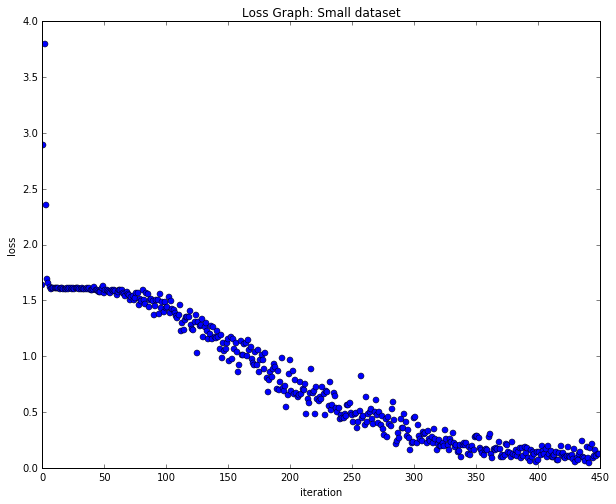

In [20]:
plt.plot(solver.loss_history, 'o')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('Loss Graph: Small dataset')

fname = 'plots/loss_%s_lr_%.4f_weight_%.4f_epochs_%d_batch_%d.jpg' % (DATA_BATCH+DATA_SIZE, LEARN_RATE, WEIGHT_SCALE, NUM_EPOCHS, BATCH_SIZE)
plt.savefig(fname)

plt.show()

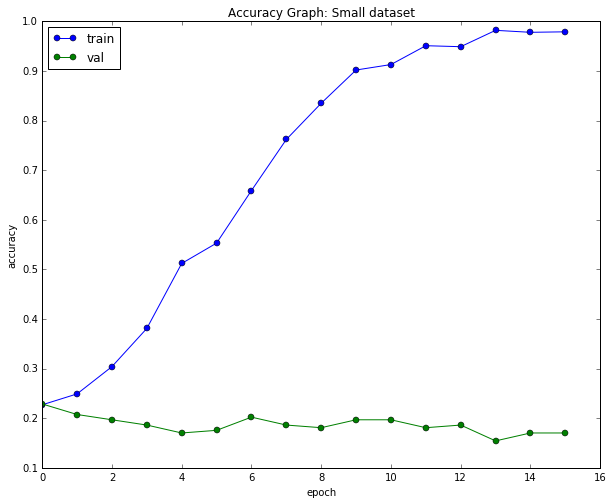

In [21]:
plt.plot(solver.train_acc_history, '-o')
plt.plot(solver.val_acc_history, '-o')
plt.legend(['train', 'val'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy Graph: Small dataset')


fname = 'plots/accuracy_%s_lr_%.4f_weight_%.4f_epochs_%d_batch_%d.jpg' % (DATA_BATCH+DATA_SIZE, LEARN_RATE, WEIGHT_SCALE, NUM_EPOCHS, BATCH_SIZE)

plt.savefig(fname)

plt.show()

### Using Batch Norm Conv Net

In [9]:
# Hyperparams
LEARN_RATE = 1e-4
WEIGHT_SCALE = 1e-2
NUM_EPOCHS = 10
BATCH_SIZE = 50
REGULARIZATION = 0.001

In [10]:
model = BatchNormConvNet(input_dim = (C, W, H), num_classes = 5, weight_scale=WEIGHT_SCALE, reg=REGULARIZATION)

solver = Solver(model, full_data,
                num_epochs=NUM_EPOCHS, batch_size=BATCH_SIZE,
                update_rule='adam',
                optim_config={
                  'learning_rate': LEARN_RATE,
                },
                verbose=True, print_every=1)
solver.train()

dout (50, 5)
w.T (5, 100)
dout after affine_backward  (50, 100)
dout

AttributeError: 'NoneType' object has no attribute 'shape'